In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/earth-observation-delhi-airshed/delhi_airshed.geojson
/kaggle/input/earth-observation-delhi-airshed/delhi_ncr_region.geojson
/kaggle/input/earth-observation-delhi-airshed/worldcover_bbox_delhi_ncr_2021.tif
/kaggle/input/earth-observation-delhi-airshed/rgb/28.2266_77.5234.png
/kaggle/input/earth-observation-delhi-airshed/rgb/28.4266_77.2822.png
/kaggle/input/earth-observation-delhi-airshed/rgb/28.7591_77.2058.png
/kaggle/input/earth-observation-delhi-airshed/rgb/28.5355_77.3910.png
/kaggle/input/earth-observation-delhi-airshed/rgb/28.2943_77.0234.png
/kaggle/input/earth-observation-delhi-airshed/rgb/28.6942_77.1821.png
/kaggle/input/earth-observation-delhi-airshed/rgb/28.9266_77.4321.png
/kaggle/input/earth-observation-delhi-airshed/rgb/28.2442_77.1821.png
/kaggle/input/earth-observation-delhi-airshed/rgb/28.9178_77.0909.png
/kaggle/input/earth-observation-delhi-airshed/rgb/28.7591_76.8646.png
/kaggle/input/earth-observation-delhi-airshed/rgb/28.6766_77.4734.png
/kaggle/in

In [2]:
!pip install geopandas matplotlib shapely

In [3]:
import matplotlib.pyplot as plt
import geopandas
import shapely

shapefile_ncr = '/kaggle/input/earth-observation-delhi-airshed/delhi_ncr_region.geojson'

delhi_ncr = geopandas.read_file(shapefile_ncr)

In [4]:
delhi_ncr.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
delhi_ncr_m = delhi_ncr.to_crs(epsg=32643)

x_min, y_min, x_max, y_max = delhi_ncr_m.total_bounds
x_min, y_min, x_max, y_max

(546142.9999656422, 2956097.2599823284, 841674.2309820709, 3319945.580006641)

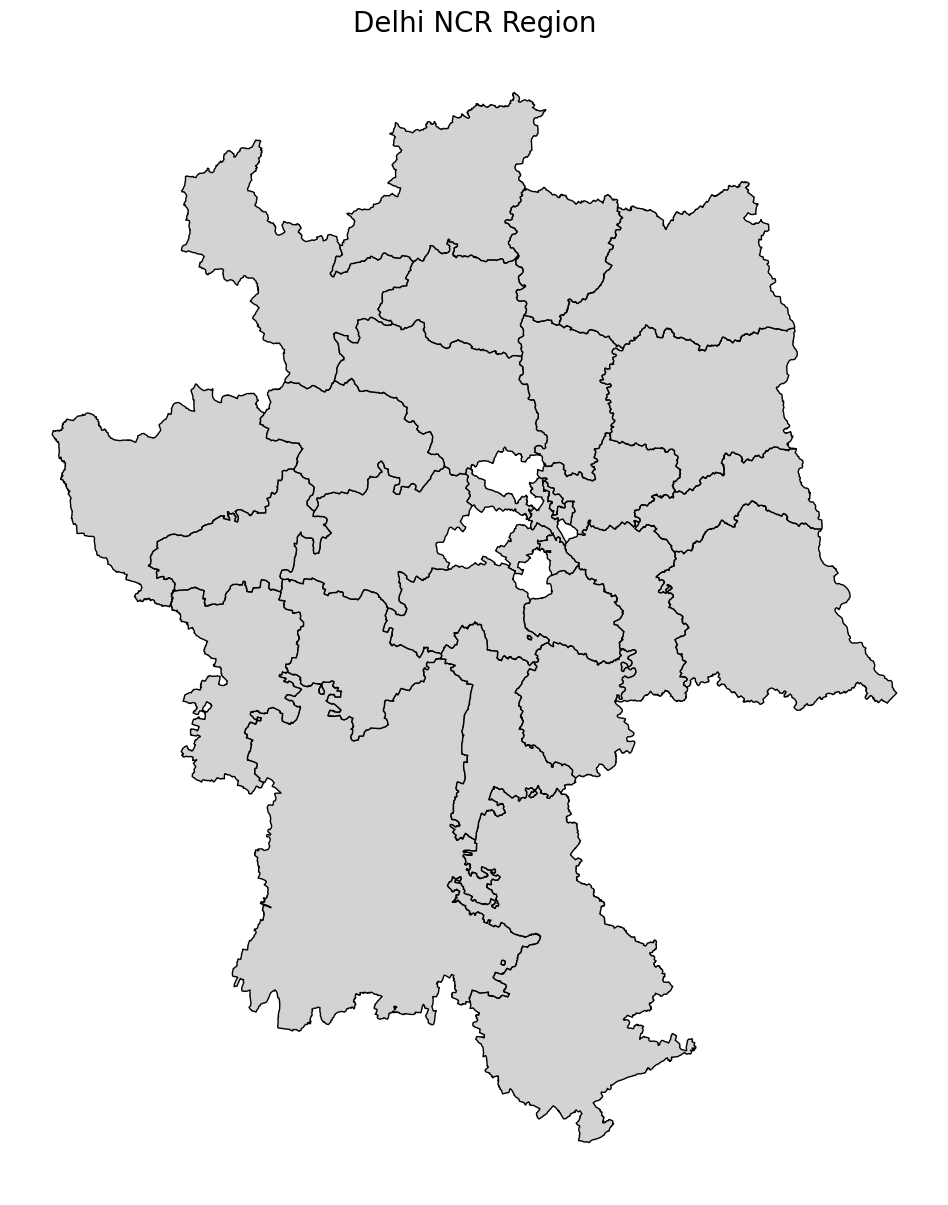

In [6]:
fig, axis = plt.subplots(figsize=(15, 15))
delhi_ncr.plot(ax=axis, color='lightgrey', edgecolor='black')
axis.set_title('Delhi NCR Region', fontsize=20)
plt.axis('off')
plt.show()

In [7]:
# grid overlay

# grid size = 60km
grid_size = 60000

# divide x length into parts of 60km to get coordinates of 60km length on x axis
x_coordinates = np.arange(x_min, x_max, grid_size)
print(x_coordinates.shape)

#similarly for y axis
y_coordinates = np.arange(y_min, y_max, grid_size)
print(y_coordinates.shape)

(5,)
(7,)


In [8]:
from shapely import box

grid_cells = []

for x in x_coordinates:
    for y in y_coordinates:
        cell = box(x, y, x+grid_size, y+grid_size)
        grid_cells.append(cell)

grid_geo_df = geopandas.GeoDataFrame({'geometry': grid_cells}, crs=delhi_ncr_m.crs)

In [9]:
!pip install leafmap 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.1/568.1 kB 14.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.7/220.7 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 96.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 837.4/837.4 kB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.8/206.8 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 5.3 MB/s eta 0:00:00


In [10]:
# basemap has crs wgs
delhi_ncr_wgs = delhi_ncr_m.to_crs(epsg=4326)
grid_geo_df_wgs = grid_geo_df.to_crs(epsg = 4326)

center_point = delhi_ncr_wgs.unary_union.centroid
center_lat_lon = [center_point.y, center_point.x]
center_lat_lon

[28.484853199713758, 76.96780799805482]

In [11]:
from shapely.geometry import Point
corners, centers = [], []

for cell in grid_geo_df_wgs.geometry:
    bounding_values = cell.bounds
    x_min, y_min, x_max, y_max = bounding_values
    corners.extend([Point(x_min, y_min), Point(x_min, y_max), Point(x_max, y_min), Point(x_max, y_max)])

    center = cell.centroid
    centers.append(center)


# form geo df

corners_geo_df = geopandas.GeoDataFrame(geometry=corners, crs=grid_geo_df_wgs.crs)
centers_geo_df = geopandas.GeoDataFrame(geometry=centers, crs=grid_geo_df_wgs.crs)

corners_geo_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
import leafmap.foliumap as leafmap
from IPython.display import IFrame

corners_geo_df['lon'] = corners_geo_df.geometry.x
corners_geo_df['lat'] = corners_geo_df.geometry.y
centers_geo_df['lon'] = centers_geo_df.geometry.x
centers_geo_df['lat'] = centers_geo_df.geometry.y

leaf_map = leafmap.Map(center=center_lat_lon, zoom=10)
leaf_map.add_basemap('satellite')

# add layer of ncr shapeline first
leaf_map.add_gdf(delhi_ncr_wgs, layer_name='ncr shapefile', style={"color": "black", "fillOpacity": 0.1})
leaf_map.add_gdf(grid_geo_df_wgs, layer_name="60x60 km grid", style={"color": "red", "fillOpacity": 0})
leaf_map.add_points_from_xy(
    corners_geo_df,
    x="lon",
    y="lat",
    layer_name="Corners",
    color="blue",
    radius=6,
    popup=["lat", "lon"]
)
leaf_map.add_points_from_xy(
    centers_geo_df,
    x="lon",
    y="lat",
    layer_name="Centers",
    color="yellow",
    radius=6,
    popup=["lat", "lon"]
)

leaf_map.to_html("test_marker_map.html")
IFrame("test_marker_map.html", width=1000, height=600)

Basemap can only be one of the following: OpenStreetMap, ROADMAP, SATELLITE, TERRAIN, HYBRID, FWS NWI Wetlands, FWS NWI Wetlands Raster, NLCD 2021 CONUS Land Cover, NLCD 2019 CONUS Land Cover, NLCD 2016 CONUS Land Cover, NLCD 2013 CONUS Land Cover, NLCD 2011 CONUS Land Cover, NLCD 2008 CONUS Land Cover, NLCD 2006 CONUS Land Cover, NLCD 2004 CONUS Land Cover, NLCD 2001 CONUS Land Cover, USGS NAIP Imagery, USGS NAIP Imagery False Color, USGS NAIP Imagery NDVI, USGS Hydrography, USGS 3DEP Elevation, USGS 3DEP Elevation Index, ESA WorldCover 2020, ESA WorldCover 2020 S2 FCC, ESA WorldCover 2020 S2 TCC, ESA WorldCover 2021, ESA WorldCover 2021 S2 FCC, ESA WorldCover 2021 S2 TCC, USGS.Imagery, BaseMapDE.Color, BaseMapDE.Grey, BasemapAT.basemap, BasemapAT.grau, BasemapAT.highdpi, BasemapAT.orthofoto, BasemapAT.overlay, BasemapAT.surface, BasemapAT.terrain, CartoDB.DarkMatter, CartoDB.DarkMatterNoLabels, CartoDB.DarkMatterOnlyLabels, CartoDB.Positron, CartoDB.PositronNoLabels, CartoDB.Positron

In [13]:
import os

image_folder= '/kaggle/input/earth-observation-delhi-airshed/rgb'

image_files = [file for file in os.listdir(image_folder) if file.endswith('.png')]

img_data_geo = []

for file in image_files:
    lat, lon = file.replace('.png', '').split('_')
    lat, lon = float(lat), float(lon)
    img_data_geo.append({'geometry': Point(lon, lat), 'lat': lat, 'lon': lon, 'file': file})

img_geo_df = geopandas.GeoDataFrame(data=img_data_geo, crs=delhi_ncr_wgs.crs)
filtered_geo_df = geopandas.sjoin(img_geo_df, grid_geo_df_wgs, how='inner', predicate='within')


In [14]:
len(img_geo_df), len(filtered_geo_df)

(9216, 9216)

In [15]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 84.2 MB/s eta 0:00:00:00:0100:01


In [16]:
#import rasterio for working with raster file
import rasterio
from rasterio.windows import Window

land_cover_file = '/kaggle/input/earth-observation-delhi-airshed/worldcover_bbox_delhi_ncr_2021.tif'
raster = rasterio.open(land_cover_file)

raster.shape

(9600, 9602)

In [17]:
raster.crs

CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]')

In [18]:
patch_size = 128

output_folder = 'patches'
os.makedirs(output_folder, exist_ok=True)

In [19]:
img_geo_df.head()

,geometry,lat,lon,file
0,POINT (77.52340 28.22660),28.2266,77.5234,28.2266_77.5234.png
1,POINT (77.28220 28.42660),28.4266,77.2822,28.4266_77.2822.png
2,POINT (77.20580 28.75910),28.7591,77.2058,28.7591_77.2058.png
3,POINT (77.39100 28.53550),28.5355,77.3910,28.5355_77.3910.png
4,POINT (77.02340 28.29430),28.2943,77.0234,28.2943_77.0234.png


In [20]:
raster.index(77.5234, 28.2266)

(9280, 8081)

In [21]:
for idx, row in img_geo_df.iterrows():
    lat, lon = row['lat'], row['lon']

    row_center, col_center = raster.index(lon, lat)
    window = Window(col_center - (patch_size//2), row_center - (patch_size//2),patch_size,patch_size)
    patch = raster.read(1, window=window)
    np.save(os.path.join(output_folder, f"{row['file']}.npy"), patch)
    
    

In [22]:
# get mode of each patch

def get_mode_patchwise(patch_np):
    flat = patch_np.flatten()
    flat = flat[(flat > 0) & (flat < 255)]
    mode_patch = mode(flat, keepdims=False)
    return int(mode_patch.mode)

In [23]:
patch_files = [file for file in os.listdir(output_folder) if file.endswith('.npy')]
# patch_files

In [24]:
esa_class_mapping = {
    10: "Forest",
    20: "Shrubland",
    30: "Grassland",
    40: "Cropland",
    50: "Urban",
    60: "Barren",
    70: "Snow/Ice",
    80: "Water",
    90: "Wetland",
    95: "Mangroves",
    100: "Moss/Lichen"
}

In [25]:
from skimage.filters import rank
from skimage.morphology import disk
from skimage.util import img_as_ubyte

def compute_texture_metrics(patch_np):
    patch_uint8 = img_as_ubyte(patch_np.astype(np.uint8))  # ensure 0-255
    entropy = rank.entropy(patch_uint8, disk(3)).mean()
    std_dev = patch_uint8.std()
    return entropy, std_dev

def get_label_using_texture(classes, entropy, stddev):
    texture_scores = {}

    for class_id in classes:
        if class_id in [10, 50, 95]:  # Forest, Urban, Mangroves
            score = entropy + stddev
        elif class_id in [80, 70, 100]:  # Water, Snow/Ice, Moss/Lichen
            score = -entropy - stddev
        elif class_id in [30, 60]:  # Grassland, Barren
            score = -abs(entropy - 1.5)
        elif class_id == 40:  # Cropland
            score = -abs(stddev - 5)
        else:  # Wetland, Shrubland
            score = entropy
        texture_scores[class_id] = score

    return max(texture_scores, key=texture_scores.get)

In [26]:
def get_patch_label(patch_np):
    flat = patch_np.flatten()
    valid_flat = flat[(flat > 0) & (flat<255)]

    if len(valid_flat) == 0:
        return None, "No Data", 0,0

    # compute texture in case multi labels
    entropy, stddev = compute_texture_metrics(patch_np)
    
    # calculating mode
    classes, counts = np.unique(valid_flat, return_counts=True)
    max_count = np.max(counts)
    classes = classes[counts==max_count]

    if len(classes) == 1:
        mode_class = int(classes[0]) # zeroth element

    else:
        mode_class = get_label_using_texture(classes, entropy, stddev)

    label = esa_class_mapping.get(mode_class, "Unknown")
    return mode_class, label, list(classes), entropy, stddev

In [27]:
results = []

patch_files = [f for f in os.listdir(output_folder) if f.endswith(".npy")]

for file in patch_files:
    full_path = os.path.join(output_folder, file)
    patch_np = np.load(full_path)
    
    mode_class, label, tied, entropy, stddev = get_patch_label(patch_np)

    results.append({
        "filename": file,
        "mode_class": mode_class if mode_class is not None else -1,
        "label": label,
        "tie_classes": tied,
        "entropy": round(entropy, 3),
        "stddev": round(stddev, 3)
    })

In [28]:
df = pd.DataFrame(results)
df.head()

,filename,mode_class,label,tie_classes,entropy,stddev
0,28.7943_77.0058.png.npy,40,Cropland,[40],0.076,4.868
1,28.4556_77.1058.png.npy,10,Forest,[10],0.472,15.060
2,28.8178_77.2322.png.npy,40,Cropland,[40],0.026,1.868
3,28.4678_77.5733.png.npy,50,Urban,[50],0.678,14.886
4,28.4590_77.2943.png.npy,50,Urban,[50],0.344,15.222


In [29]:
from sklearn.model_selection import train_test_split

#remove No Data rows
df = df[df['label'] != 'No Data']

train_df, test_df = train_test_split(df, train_size=0.6, stratify=df['label'], random_state=42)
train_df.shape, test_df.shape

((5529, 6), (3687, 6))

In [30]:
train_counts = train_df["label"].value_counts().sort_index()
test_counts = test_df["label"].value_counts().sort_index()

train_counts, test_counts

(label
 Barren          2
 Cropland     3606
 Forest        281
 Grassland     101
 Shrubland     177
 Urban        1357
 Water           4
 Wetland         1
 Name: count, dtype: int64,
 label
 Barren          1
 Cropland     2404
 Forest        188
 Grassland      68
 Shrubland     118
 Urban         904
 Water           3
 Wetland         1
 Name: count, dtype: int64)

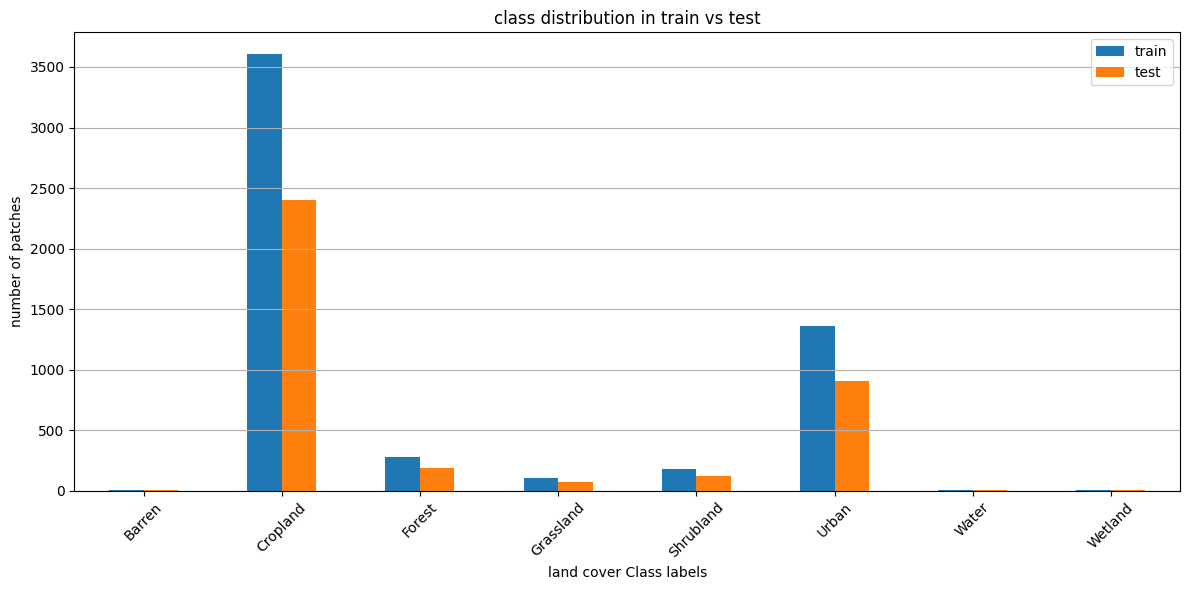

In [31]:
combined_df = pd.DataFrame({
    'train': train_counts,
    'test': test_counts
})

combined_df.plot(kind="bar", figsize=(12, 6))
plt.title("class distribution in train vs test")
plt.xlabel("land cover Class labels")
plt.ylabel("number of patches")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [32]:
"""
talking about class distrubution:

Train:
 label        Count
 Barren          2
 Cropland     3606
 Forest        281
 Grassland     101
 Shrubland     177
 Urban        1357
 Water           4
 Wetland         1

 Test:
 label       Count
 Barren          1
 Cropland     2404
 Forest        188
 Grassland      68
 Shrubland     118
 Urban         904
 Water           3
 Wetland         1

 Class imbalance can be seen as Cropland, Urban has majority patches 
 covered followed by Forest, Grassland and Shrubland and the least count
 for Barren, Water, Wetland
"""

'\ntalking about class distrubution:\n\nTrain:\n label        Count\n Barren          2\n Cropland     3606\n Forest        281\n Grassland     101\n Shrubland     177\n Urban        1357\n Water           4\n Wetland         1\n\n Test:\n label       Count\n Barren          1\n Cropland     2404\n Forest        188\n Grassland      68\n Shrubland     118\n Urban         904\n Water           3\n Wetland         1\n\n Class imbalance can be seen as Cropland, Urban has majority patches \n covered followed by Forest, Grassland and Shrubland and the least count\n for Barren, Water, Wetland\n'

In [33]:
# Train a CNN

import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
from PIL import Image

# config

img_dir = '/kaggle/input/earth-observation-delhi-airshed/rgb'
num_classes = 11
img_size=128
batch_size=64
epochs=20
device='cpu'

class_names = sorted(df['label'].unique())
class_names

['Barren',
 'Cropland',
 'Forest',
 'Grassland',
 'Shrubland',
 'Urban',
 'Water',
 'Wetland']

In [48]:
label_to_idx = {label: idx for idx, label in enumerate(class_names)}
label_to_idx

{'Barren': 0,
 'Cropland': 1,
 'Forest': 2,
 'Grassland': 3,
 'Shrubland': 4,
 'Urban': 5,
 'Water': 6,
 'Wetland': 7}

In [35]:
train_df['label_idx'] = train_df['label'].map(label_to_idx)
test_df['label_idx'] = test_df['label'].map(label_to_idx)

transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor()
])

class PatchDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_name = self.df.loc[idx, "filename"].replace(".npy", "") 
        label = self.df.loc[idx, "label_idx"]
        img_path = os.path.join(img_dir, img_name)
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label


train_dataset = PatchDataset(train_df, transform)
test_dataset = PatchDataset(test_df, transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

len(train_loader), len(test_loader)

(87, 58)

In [36]:
import torch.nn as nn
import torch.optim as optim

model = models.resnet18(weights=None)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)


In [37]:
for epoch in range(epochs):
    model.train()
    running_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    acc = correct / total * 100
    print(f"Epoch [{epoch+1}/{epochs}] Loss: {running_loss/total:.4f} | Accuracy: {acc:.2f}%")

Epoch [1/20] Loss: 0.6393 | Accuracy: 80.20%
Epoch [2/20] Loss: 0.4574 | Accuracy: 85.44%
Epoch [3/20] Loss: 0.4337 | Accuracy: 85.71%
Epoch [4/20] Loss: 0.4070 | Accuracy: 86.36%
Epoch [5/20] Loss: 0.3704 | Accuracy: 87.12%
Epoch [6/20] Loss: 0.3502 | Accuracy: 88.12%
Epoch [7/20] Loss: 0.3256 | Accuracy: 88.95%
Epoch [8/20] Loss: 0.3060 | Accuracy: 89.17%
Epoch [9/20] Loss: 0.2653 | Accuracy: 90.40%
Epoch [10/20] Loss: 0.2584 | Accuracy: 90.94%
Epoch [11/20] Loss: 0.2172 | Accuracy: 91.90%
Epoch [12/20] Loss: 0.2013 | Accuracy: 92.84%
Epoch [13/20] Loss: 0.1575 | Accuracy: 94.00%
Epoch [14/20] Loss: 0.1359 | Accuracy: 95.06%
Epoch [15/20] Loss: 0.1225 | Accuracy: 95.60%
Epoch [16/20] Loss: 0.1008 | Accuracy: 96.69%
Epoch [17/20] Loss: 0.0694 | Accuracy: 97.56%
Epoch [18/20] Loss: 0.0679 | Accuracy: 97.70%
Epoch [19/20] Loss: 0.0632 | Accuracy: 97.78%
Epoch [20/20] Loss: 0.0533 | Accuracy: 98.14%


In [46]:
def f1_score(y_true, y_pred, class_names, label_to_idx, epsilon=1e-7):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    f1_scores = []

    for cls in class_names:
        cls_idx = label_to_idx[cls]

        true_pos = np.sum((y_true == cls_idx) & (y_pred == cls_idx))
        false_pos = np.sum((y_true != cls_idx) & (y_pred == cls_idx))
        false_neg = np.sum((y_true == cls_idx) & (y_pred != cls_idx))

        precision = true_pos / (true_pos + false_pos + epsilon)
        recall = true_pos / (true_pos + false_neg + epsilon)

        if precision + recall == 0:
            f1 = 0.0
        else:
            f1 = 2 * precision * recall / (precision + recall + epsilon)

        f1_scores.append(f1)

    mean_f1 = np.mean(f1_scores)
    return mean_f1, f1_scores


In [49]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        preds = outputs.argmax(dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.numpy())

num_classes = len(class_names)
macro_f1, per_class_f1 = f1_score(all_labels, all_preds, class_names, label_to_idx)

print(f"Macro F1 Score: {macro_f1:.4f}")
for idx, score in enumerate(per_class_f1):
    print(f"{class_names[idx]} F1: {score:.4f}")


Macro F1 Score: 0.3136
Barren F1: 0.0000
Cropland F1: 0.6621
Forest F1: 0.5614
Grassland F1: 0.0449
Shrubland F1: 0.1478
Urban F1: 0.8257
Water F1: 0.2667
Wetland F1: 0.0000


In [50]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.4 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.10.19
    Uninstalling nvidia-curand-cu12-

In [51]:
from torchmetrics.classification import MulticlassF1Score

model.eval()
f1_metric = MulticlassF1Score(num_classes=num_classes, average='macro').to(device)
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        preds = outputs.argmax(dim=1)

        # Accumulate
        all_preds.append(preds)
        all_labels.append(labels)

# Concatenate all
all_preds = torch.cat(all_preds)
all_labels = torch.cat(all_labels)

# TorchMetrics F1
torchmetrics_f1 = f1_metric(all_preds, all_labels).item()
print(f"TorchMetrics Macro F1 Score: {torchmetrics_f1:.4f}")


TorchMetrics Macro F1 Score: 0.3136


<Figure size 1000x800 with 0 Axes>

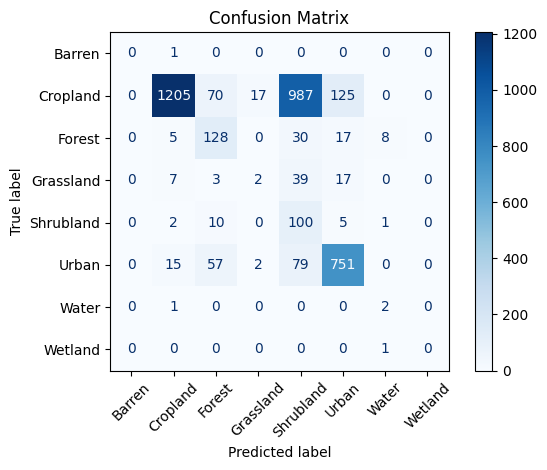

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = all_labels.cpu().numpy()
y_pred = all_preds.cpu().numpy()

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45, values_format='d')
plt.title("Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()

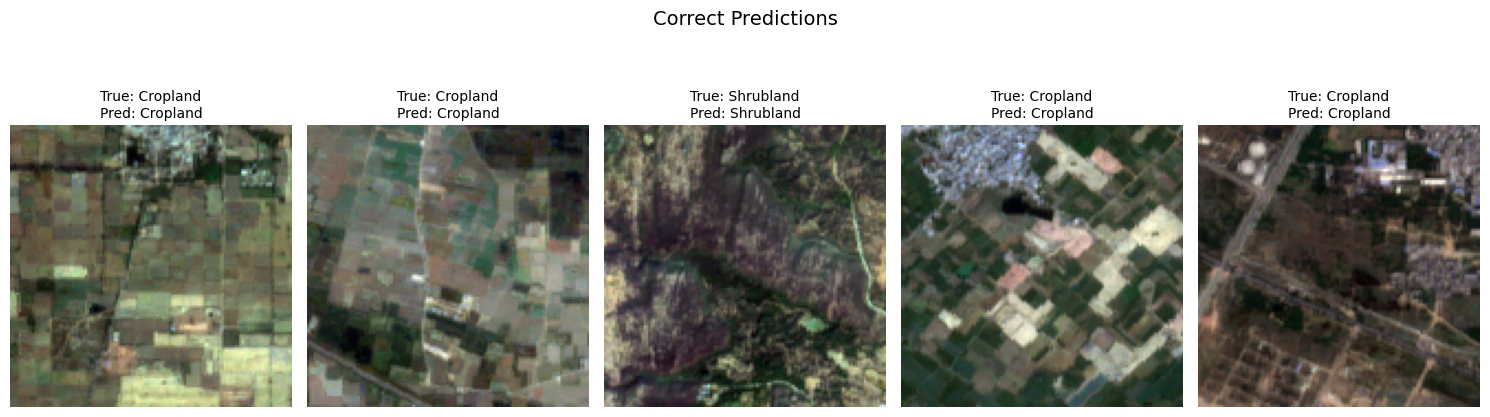

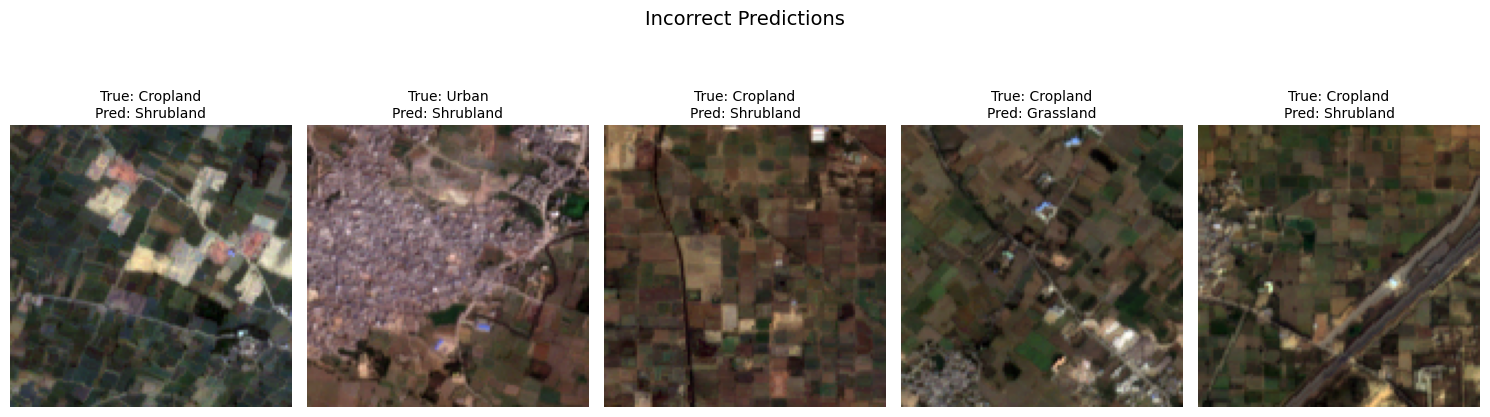

In [55]:
test_df = test_df.reset_index(drop=True)

test_df["pred_idx"] = all_preds.cpu().numpy()
test_df["true_idx"] = all_labels.cpu().numpy()
test_df["correct"] = test_df["pred_idx"] == test_df["true_idx"]

idx_to_label = {idx: label for label, idx in label_to_idx.items()}
test_df["true_label"] = test_df["true_idx"].map(idx_to_label)
test_df["pred_label"] = test_df["pred_idx"].map(idx_to_label)

correct_samples = test_df[test_df["correct"]].sample(5, random_state=42)
incorrect_samples = test_df[~test_df["correct"]].sample(5, random_state=42)

plt.figure(figsize=(15, 5))
for i, row in enumerate(correct_samples.itertuples()):
    img_path = os.path.join(img_dir, row.filename.replace(".npy", ""))
    img = Image.open(img_path)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"True: {row.true_label}\nPred: {row.pred_label}", fontsize=10)

plt.suptitle("Correct Predictions", fontsize=14)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
for i, row in enumerate(incorrect_samples.itertuples()):
    img_path = os.path.join(img_dir, row.filename.replace(".npy", ""))
    img = Image.open(img_path)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"True: {row.true_label}\nPred: {row.pred_label}", fontsize=10)

plt.suptitle("Incorrect Predictions", fontsize=14)
plt.tight_layout()
plt.show()